# <font color='00BFEB'> Topic Modelling Of BBC News Articles | NMF With Sklearn. </font>  <br/>
 <font color='#fd79a8'> Aim: Get only <font color='#ffdd59'>UK political theme and Goveranance News  </font>  <br> Non-Matrix Factorization<br> Unsupervised text Classification

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
dataset_path = '../../datasets/BBC_08_APR_17_to_08_JUN_2017.csv'

bbc = pd.read_csv(dataset_path)
bbc.head()

,article,date,panda_date,headline,summary,url
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828


In [3]:
bbc['article'][12]

'Venezuela opposition leader Capriles banned from politics A leading Venezuelan opposition leader, Henrique Capriles, has been formally banned for 15 years from public office.  Mr Capriles has been at the forefront of demands for a recall referendum on President Nicolas Maduro.  There was no immediate comment from the government on the ban. In a heated press conference, Mr Capriles said he would continue in his post as governor of Miranda state and called for a protest march to be held on Saturday.  Mr Capriles, who has run twice as a presidential candidate, is seen as the opposition\'s best hope of defeating President Maduro in elections scheduled for next year.  The ban comes after a week of several large opposition-led protests in the capital Caracas. They accuse the government of stifling dissent. On Thursday a man was shot dead during the demonstrations.  The Venezuelan comptroller\'s office has for a decade used a procedure known as "disqualification" that bans politicians from h

In [4]:
bbc['headline'][100]

'One dizzying day of Trump U-turns'

 <font color='#fd79a8'> Result: Average number of words per headline <font color='#ffdd59'>apply-lambda  </font><br>create a column which contains no of words<br>
Use apply-lambda to create the logic needed. <br>Lambda functions consist of three parts: <br> Keyword | Bound variable/argument | Body or expression<br>
<font color='#ffdd59'>lambda x:x

In [5]:
bbc['word_titles'] = bbc['headline'].apply(lambda x: len(x.split()))
bbc.describe()

,word_titles
count,988.000000
mean,6.167004
std,1.028196
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


Text(0.5, 1.0, 'Distribution of number of words in the BBC News Headlines')

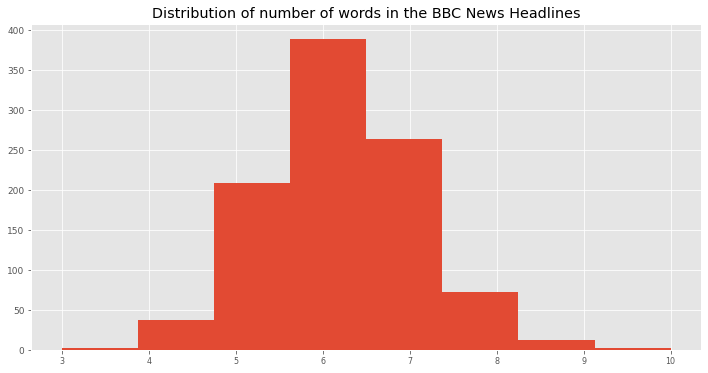

In [7]:
bbc[['word_titles']].hist(figsize=(12,6), bins=8, xlabelsize=8, ylabelsize=9) 
plt.title("Distribution of number of words in the BBC News Headlines")

 <font color='#fd79a8'>We can see that most of the headlines have around 4-6 words. Show the frequent used words in headlines. 

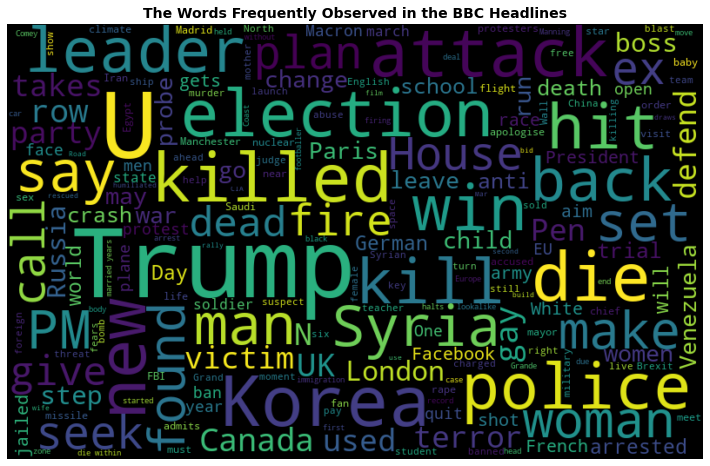

In [8]:
all_words = ''.join([word for word in bbc['headline'][0:10000]])
all_words 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("The Words Frequently Observed in the BBC Headlines", weight='bold', fontsize=14)
plt.show()

 <font color='00BFEB'> TF-IDF is a BoW method<br> NMF can use tf-IDF. LDA can only use raw term counts for LDA as it is a probablistic graphical model. <br>min_df: float in range [0.0, 1.0] or int, default=1<br>max_df: float in range [0.0, 1.0] or int, default=1.0<br> The headlines need to be proprocessed before they can be put into DTM

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

 <font color='00BFEB'> Create the DTM - document term matrix<br>basically a matrix, with documents designated by rows and words by columns<br>dtm is constructed with TFIDF scores as entries so that words that are common across all the articles are down-weighted

In [10]:
dtm = vectorizer.fit_transform(bbc['article'].values.astype('U'))
dtm

<988x12545 sparse matrix of type '<class 'numpy.float64'>'
	with 156988 stored elements in Compressed Sparse Row format>

 <font color='00BFEB'>The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).<br> [Click Here for more info on dtype ](https://numpy.org/devdocs/reference/arrays.dtypes.html)

 <font color='00BFEB'>NumPy is used to work with arrays. The array object in NumPy is called ndarray.<br>We can create a NumPy ndarray object by using the array() function.<br>we can pass a list or array-like object into the array() method, and it will be converted into an ndarray<br>To obtain the number of items identified by the dtm function. <br>Returns a list of feature names, ordered by their indices.<br>len - number of items in an object.

In [11]:
words = np.array(vectorizer.get_feature_names())
print(len(words)) 

12545


/home/valerien/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <font color='#ffdd59'> Non-Matrix Factorization NMF  

<font color='#ffdd59'>SKLEARN is used for NMF; Next lecture - Gensim used for LDA

In [ ]:
from sklearn.decomposition import NMF
import random 

 <font color='#fd79a8'>Estimate the NMF topic model on the corpus of BBC headlines. Pick the number of topics. <br>NMF components are topics<br>The first line below constructs an NMF model using the function “NMF.” The first input to the function is the number of topics which is set to “n_components=___.”<br> The second input sets the seed for random number generators so that the function will yield the same results every time it is executed.

In [ ]:
nmf_mod = NMF(n_components=15,random_state=42)
nmf_mod.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=15, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

 <font color='#fd79a8'>verbose = 0 | an option for producing detailed logging information. You should be aware, and will probably notice if you enable verbose > 0, that printing to the screen is generally a very slow process.<br>max_iter defaults to 200 - maximum number of iterations | <br>Alpha: Constant that multiplies the regularization terms. Set it to zero to have no regularization.<br>Frobenius Norm; beta_loss is set to this as default - discuss the mathematics of Frobenius Norm later in this chapter. 

 <font color='#fd79a8'>#NMF gives values with the highest coefficient, not probabiltiy like with LDA

In [ ]:
for index, topic in enumerate(nmf_mod.components_):
  print(f"The TOP 15 words for Topic#{index}")
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])

The TOP 15 words for Topic#0
['women', 'told', 'murder', 'woman', 'facebook', 'ms', 'school', 'year', 'man', 'mr', 'family', 'death', 'court', 'police', 'said']
The TOP 15 words for Topic#1
['launch', 'ballistic', 'military', 'missiles', 'tests', 'test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']
The TOP 15 words for Topic#2
['intelligence', 'clinton', 'senate', 'director', 'flynn', 'russian', 'investigation', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']
The TOP 15 words for Topic#3
['paris', 'party', 'round', 'candidate', 'candidates', 'election', 'ms', 'emmanuel', 'marine', 'mr', 'french', 'france', 'pen', 'le', 'macron']
The TOP 15 words for Topic#4
['government', 'air', 'weapons', 'al', 'said', 'russian', 'iran', 'rebel', 'assad', 'attack', 'zones', 'russia', 'chemical', 'syrian', 'syria']
The TOP 15 words for Topic#5
['streets', 'elections', 'mr', 'protesters', 'tear', 'assembly', 'president', 'government', 'v

 <font color='#fd79a8'>With the estimated model, we check the top 10 most likely words in each topic with .components<br>The <font color='#ffdd59'>components_</font> attribute of the estimated model is a topic-by-word matrix with each entry denoting the weight of the corresponding word in the corresponding topic. We then go through this topic-by-word matrix row by row and print out the 10 most likely words for each row. Note that the words are printed out in increasing order of their weights.

 <font color='#fd79a8'>Combine topics with original data..transform() on vectorized articles to attach a label number. Latent themes are observed. 

In [ ]:
bbc_topics = nmf_mod.transform(dtm)

 <font color='#fd79a8'>argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion. 

<font color='#fd79a8'>argsort - sort in ascending order

In [ ]:
bbc_topics[1].argsort()

array([ 1,  3,  4,  6,  9, 10, 13,  5,  2,  8, 12, 14, 11,  0,  7])

In [ ]:
bbc_topics[1].argmax()

7

In [ ]:
bbc_topiclabels = {0: 'Crime Victims & Public Safety',
                   1:'Foreign Defense: North Korea',
                   2:'US Politics',
                   3:'Euro: French Politics',
                   4:'International Relations: War & Conflict',
                   5:'Venezuela',
                   6:'US Foreign Policy',
                   7:'UK Security & Terrorism',
                   8:'UK Politics: Brexit',
                   9:'Latin American Politics',
                   10:'Sport',
                   11:'Afghanistan: Extremist',
                   12:'Travel',
                   13:'Egypt',
                   14:'Turkey'
                   }

 <font color='#fd79a8'>If we give axis=0 then it will give the index from columns and if we give axis=1 then it will give the index from rows. To find the topic index with maximum value, we can call the argmax() method and pass 1 as the value for the axis parameter.<br>


In [ ]:
bbc['title'] = bbc_topics.argmax(axis=1)

<font color='00BFEB'>The following script adds a new column for topic in the data frame and assigns the topic value to each row in the column:

In [ ]:
bbc['topic_label'] = bbc['title'].map(bbc_topiclabels)

In [ ]:
bbc2=bbc.groupby('title').count()
bbc.head()

,article,date,panda_date,headline,summary,url,word_titles,topic,title,topic_label
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...,7,4,4,International Relations: War & Conflict
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,7,UK Security & Terrorism
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132,7,5,5,Venezuela
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,11,11,Afghanistan: Extremist
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828,6,6,6,US Foreign Policy


In [ ]:
bbc2

,article,date,panda_date,headline,summary,url,word_titles,topic,topic_label
title,,,,,,,,,
0,269,269,269,269,269,269,269,269,269
1,37,37,37,37,37,37,37,37,37
2,52,52,52,52,52,52,52,52,52
3,33,33,33,33,33,33,33,33,33
4,44,44,44,44,44,44,44,44,44
5,34,34,34,34,34,34,34,34,34
6,111,111,111,111,111,111,111,111,111
7,75,75,75,75,75,75,75,75,75
8,62,62,62,62,62,62,62,62,62


In [ ]:
bbc_UKtopics = bbc.loc[bbc['title'].isin([0,3,7,8])]
bbc_UKtopics.head()

,article,date,panda_date,headline,summary,url,word_titles,topic,title,topic_label
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,7,UK Security & Terrorism
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,7,UK Security & Terrorism
8,"YouTube channels need 10,000 views for adverts...",Saturday 08 April 2017,8-Apr-17,YouTube changes ad rules for new channels,YouTube video creators will now have to pass a...,http://www.bbc.com/news/technology-39527043,7,0,0,Crime Victims & Public Safety


 <font color='#fd79a8'>Wordcloud

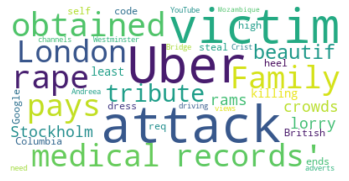

In [ ]:
text = str(bbc_UKtopics.article)
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 